In [1]:
import os
os.chdir("C:\\Users\\92sup\\Downloads\\ML")
import pandas as pd
import numpy as np
from pprint import pprint
#for fitting classification tree
from sklearn.tree import DecisionTreeClassifier
#to create a confusion matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
# For test-train split
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
#Separating the Target and the predictors
X = iris[['sepal_length','sepal_width','petal_length','petal_width']]
y = iris[['species']]

In [4]:
# Stratified random sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 100)

In [5]:
#fit the decision tree
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

[Text(279.0, 504.7714285714286, 'X[3] <= 0.8\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(186.0, 427.11428571428576, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(372.0, 427.11428571428576, 'X[3] <= 1.65\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(186.0, 349.4571428571429, 'X[0] <= 7.05\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(93.0, 271.8, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(279.0, 271.8, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(558.0, 349.4571428571429, 'X[2] <= 5.05\ngini = 0.105\nsamples = 36\nvalue = [0, 2, 34]'),
 Text(465.0, 271.8, 'X[1] <= 2.9\ngini = 0.408\nsamples = 7\nvalue = [0, 2, 5]'),
 Text(372.0, 194.14285714285717, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(558.0, 194.14285714285717, 'X[3] <= 1.75\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(465.0, 116.48571428571432, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(651.0, 116.48571428571432, 'X[2] <= 4.85\ngini = 

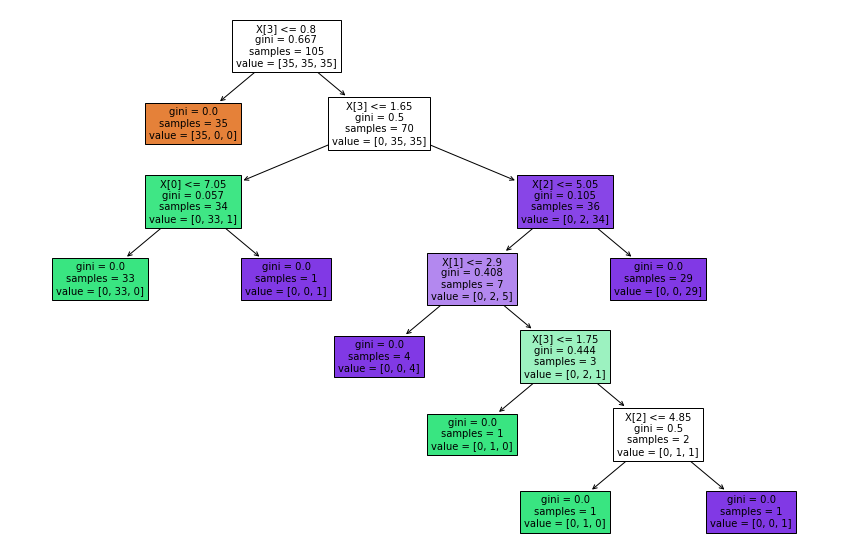

In [6]:
#PLOT THE TREE 
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True,fontsize = 10)

In [7]:
#PREDICT USING THE SAME DECISION TREE MODEL
pred=clf.predict(X_test)

# FIND THE ACCURACY OF THE MODEL
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9111111111111111

## Pruning using Package

In [8]:
## FIND Best Alpha by Cost complexity pruning path

path=clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities=path.ccp_alphas, path.impurities

In [9]:
#Print the Alpha values
ccp_alphas

array([0.        , 0.00634921, 0.01164021, 0.01848739, 0.2788671 ,
       0.33333333])

In [14]:
#FIT THE DECISION TREE CLASSIFIERS FOR EACH ALPHA
clfs=[] #classifiers
for i in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 100,ccp_alpha=i)
    clf.fit(X_train, y_train)
    clfs.append(clf)
clfs
#print("no. of last node in the tree is : {} with CCP alpha : {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

[DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(ccp_alpha=0.006349206349206349, random_state=100),
 DecisionTreeClassifier(ccp_alpha=0.011640211640211643, random_state=100),
 DecisionTreeClassifier(ccp_alpha=0.01848739495798319, random_state=100),
 DecisionTreeClassifier(ccp_alpha=0.27886710239651413, random_state=100),
 DecisionTreeClassifier(ccp_alpha=0.33333333333333354, random_state=100)]

In [15]:
#tEST THE ACCURACY SCORES FOR EACH CLASSIFIERS
test_scores=[]
for clf in clfs:
    p = [clf.score(X_test, y_test)]
    test_scores.append(p)
test_scores

[[0.9333333333333333],
 [0.9333333333333333],
 [0.9555555555555556],
 [0.9333333333333333],
 [0.6666666666666666],
 [0.3333333333333333]]

In [16]:
#test_scores
    #max(test_scores)
    # Respective Alpha for best Accuracy
index=test_scores.index(max(test_scores))
clfs[index+1]

DecisionTreeClassifier(ccp_alpha=0.01848739495798319, random_state=100)

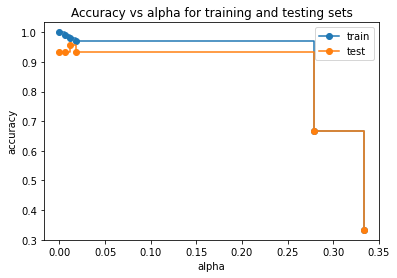

In [17]:
#PLOT IT

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

##### From the above plot we can select the best alpha value

In [18]:
# Fit the decision tree with best alpha value of 0.018
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.018)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.018, random_state=0)

In [19]:
#Predict using the same model
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9333333333333333

[Text(223.2, 237.82500000000002, 'X[3] <= 0.8\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(111.6, 169.875, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(334.79999999999995, 169.875, 'X[3] <= 1.65\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(223.2, 101.92500000000001, 'X[0] <= 7.05\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(111.6, 33.974999999999994, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(334.79999999999995, 33.974999999999994, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(446.4, 101.92500000000001, 'gini = 0.105\nsamples = 36\nvalue = [0, 2, 34]')]

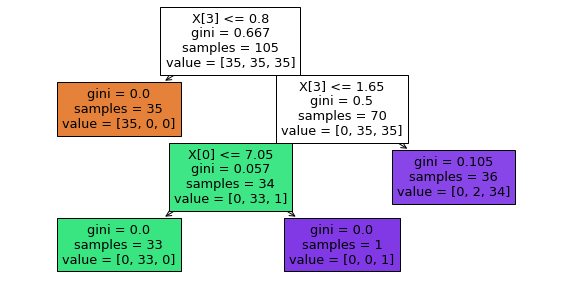

In [20]:
plt.figure(figsize=(10,5))
tree.plot_tree(clf,filled=True)

### Hence with the alpha value of 0.018 we pruned the decision tree and increased the accuracy to 93%

# selecting alpha by k fold technique

In [21]:
# Read file 
os.chdir("C:\\Users\\92sup\\Downloads\\ML")
iris=pd.read_csv("IRIS.csv")

In [22]:
# sampling the data in random manner
iris=iris.sample(len(iris))
#initize k value in k fold
k = 5
#split size i.e split the sample by k folds
split_size = int(len(iris)/k)
#print split_size
split_size

30

In [23]:
# List to store k set of data
iris_list=[]
#changing the range everytime after the loop 
p=0
#loop for splitting data
for i in range(0,k):
    iris_fold=iris.iloc[p:p+split_size]
    p=p+split_size
    iris_list.append(iris_fold)
#print the dataframe
iris_list

[     sepal_length  sepal_width  petal_length  petal_width          species
 0             5.1          3.5           1.4          0.2      Iris-setosa
 41            4.5          2.3           1.3          0.3      Iris-setosa
 48            5.3          3.7           1.5          0.2      Iris-setosa
 148           6.2          3.4           5.4          2.3   Iris-virginica
 60            5.0          2.0           3.5          1.0  Iris-versicolor
 63            6.1          2.9           4.7          1.4  Iris-versicolor
 13            4.3          3.0           1.1          0.1      Iris-setosa
 88            5.6          3.0           4.1          1.3  Iris-versicolor
 33            5.5          4.2           1.4          0.2      Iris-setosa
 123           6.3          2.7           4.9          1.8   Iris-virginica
 122           7.7          2.8           6.7          2.0   Iris-virginica
 71            6.1          2.8           4.0          1.3  Iris-versicolor
 121        

In [24]:
# Function to get the best alpha for each k fold decision tree classifier
def Alpha(train,test):
    alpha_list=[]
    
    #split data into train and test
    
    X_test  = test[['sepal_length','sepal_width','petal_length','petal_width']]
    y_test  = test['species']
    X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
    y_train = train['species']
    
    #Fit the decision tree
    clf = DecisionTreeClassifier(random_state = 0)
    clf.fit(X_train, y_train)
    # Predict using the same model
    pred=clf.predict(X_test)
    
    #Compute the alpha for each K fold classifier
    path=clf.cost_complexity_pruning_path(X_train,y_train)
    ccp_alphas, impurities=path.ccp_alphas, path.impurities
    #print (ccp_alphas)
    
    clfs=[] #classifiers
    for i in ccp_alphas:
        clf = DecisionTreeClassifier(random_state = 0,ccp_alpha=i)
        clf.fit(X_train, y_train)
        clfs.append(clf)
    test_scores=[]
    # for best accuracy score
    for clf in clfs:
        p = [clf.score(X_test, y_test)]
        test_scores.append(p)
    #test_scores
    #max(test_scores)
    # Respective Alpha for best Accuracy
    index=test_scores.index(max(test_scores))
    return(clfs[index+1])
    

In [25]:
k=5
fold_selection = 0
A_list=[]
train_data = [] 
#loop to hold one part of the test data and combine all the other parts for train data
for fold_selection in range(k): 
    fold_selects=[]
    for j in range(k):             
        if j != fold_selection:
#to hold other parts of test data
            fold_selects.append(j)
        else:
            test_data = iris_list[j]
    train_data = pd.concat([iris_list[fold_selects[0]],iris_list[fold_selects[1]],iris_list[fold_selects[2]]])
#call the function     
    A_list.append(Alpha(train_data,test_data))
    #Alpha(train_data,test_data)



In [26]:
#Print the classifiers with best alpha for each fold
A_list

[DecisionTreeClassifier(ccp_alpha=0.01851851851851852, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.010714285714285713, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.24970001675884027, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.013859020310633208, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.013859020310633208, random_state=0)]

In [27]:
#Find The AVERAGE OF ALL THE ALPHAS OF CLASSIFIERS TO OBTAIN THE BEST ALPHA VALUE
p=[]
for i in A_list:
    #for j in 
        #print(i)
        p.append(i.ccp_alpha)
#print(p)
total=0
for values in p:
    total = total+values
avg = total/len(p)
print(avg)

0.06133017232258218


In [28]:
#FIT THE DECISION TREE WITH BEST OBTAINED ALPHA
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.015)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.015, random_state=0)

In [29]:
#Predict using the same model
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9333333333333333

[Text(223.2, 237.82500000000002, 'X[3] <= 0.8\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(111.6, 169.875, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(334.79999999999995, 169.875, 'X[3] <= 1.65\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(223.2, 101.92500000000001, 'X[0] <= 7.05\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(111.6, 33.974999999999994, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(334.79999999999995, 33.974999999999994, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(446.4, 101.92500000000001, 'gini = 0.105\nsamples = 36\nvalue = [0, 2, 34]')]

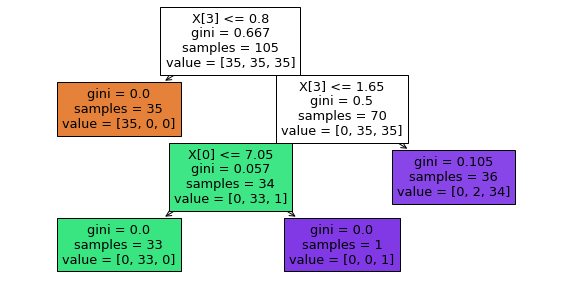

In [30]:
#Plot the Pruned Tree
plt.figure(figsize=(10,5))
tree.plot_tree(clf,filled=True)

##### Hence we have obtained the best alpha using the k fold and pruned the tree and the accuracy on prediction is 93.33%